Data Preprocessing

In [18]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science_Public/gold_standard_generation'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
significant_genes_report_corrected.csv	TCGA_dataset


In [19]:
!pip install sparse_lmm

In [20]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA_dataset/TCGA_Rectal_Cancer_(READ)/TCGA.READ.sampleMap_READ_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA_dataset/TCGA_Rectal_Cancer_(READ)/TCGA.READ.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [21]:
clinical_data.head()

,AWG_MLH1_silencing,AWG_cancer_type_Oct62011,CDE_ID_3226963,CIMP,MSI_updated_Oct62011,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,...,_GENOMIC_ID_TCGA_READ_gistic2,_GENOMIC_ID_TCGA_READ_RPPA_RBN,_GENOMIC_ID_data/public/TCGA/READ/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_READ_PDMarray,_GENOMIC_ID_data/public/TCGA/READ/miRNA_GA_gene,_GENOMIC_ID_TCGA_READ_gistic2thd,_GENOMIC_ID_TCGA_READ_exp_GAV2_exon,_GENOMIC_ID_TCGA_READ_mutation_bcm_solid_gene,_GENOMIC_ID_TCGA_READ_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_READ_exp_HiSeqV2_exon
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-AF-2687-01,NaN,NaN,MSS,NaN,NaN,TCGA-AF-2687-01,COAD-READ,NaN,COADREAD non-CIMP c11,NaN,...,TCGA-AF-2687-01A-02D-1732-01,NaN,TCGA-AF-2687-01,NaN,NaN,TCGA-AF-2687-01A-02D-1732-01,NaN,NaN,c2a39a12-e882-49aa-a5fa-5356e4bcb823,c2a39a12-e882-49aa-a5fa-5356e4bcb823
TCGA-AF-2689-01,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2689-01,COAD-READ,C7-COAD/READ,COADREAD CIMPL c10,COADREAD-like c7,...,TCGA-AF-2689-01A-01D-1549-01,TCGA-AF-2689-01A-21-1932-20,NaN,TCGA-AF-2689-01,TCGA-AF-2689-01,TCGA-AF-2689-01A-01D-1549-01,NaN,TCGA-AF-2689-01A-01W-0831-10,NaN,NaN
TCGA-AF-2689-11,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2689-11,NaN,C7-COAD/READ,NaN,NaN,...,NaN,NaN,TCGA-AF-2689-11,NaN,NaN,NaN,NaN,NaN,a061d300-0dec-42c6-a21c-13af7bba943d,a061d300-0dec-42c6-a21c-13af7bba943d
TCGA-AF-2690-01,NaN,NaN,MSS,NaN,NaN,TCGA-AF-2690-01,COAD-READ,NaN,COADREAD non-CIMP c11,COADREAD-like c7,...,TCGA-AF-2690-01A-02D-1732-01,TCGA-AF-2690-01A-11-1932-20,TCGA-AF-2690-01,NaN,NaN,TCGA-AF-2690-01A-02D-1732-01,NaN,NaN,dfcfd7e4-4475-4791-a549-c1778db32ae2,dfcfd7e4-4475-4791-a549-c1778db32ae2
TCGA-AF-2691-01,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2691-01,COAD-READ,C7-COAD/READ,COADREAD CIMPL c10,NaN,...,TCGA-AF-2691-01A-01D-1549-01,NaN,NaN,TCGA-AF-2691-01,TCGA-AF-2691-01,TCGA-AF-2691-01A-01D-1549-01,a7fa7e33-58e4-4463-b697-61a9c58bf9e1,TCGA-AF-2691-01A-01W-0831-10,NaN,NaN


In [22]:
gene_data.head()


,TCGA-DC-6156-01,TCGA-DC-6160-01,TCGA-EI-6512-01,TCGA-DC-5869-01,TCGA-EI-6507-01,TCGA-AF-3911-01,TCGA-EI-7004-01,TCGA-G5-6572-01,TCGA-EF-5830-01,TCGA-F5-6812-01,...,TCGA-CI-6620-01,TCGA-AG-3725-01,TCGA-AH-6643-01,TCGA-DY-A0XA-01,TCGA-AF-3400-11,TCGA-EI-6506-01,TCGA-AF-2692-11,TCGA-AF-A56K-01,TCGA-DC-6154-01,TCGA-AG-3592-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.335208,0.452908,1.179008,0.163108,0.126508,1.096808,0.552108,0.848808,1.359908,1.343608,...,1.045008,1.399708,0.491908,0.630708,1.540308,1.454808,0.869808,0.855608,1.480208,0.911308
HIF3A,-1.158126,-2.582626,-0.892726,0.122474,-0.709026,-1.862026,-1.704726,1.253474,-1.331526,-0.012826,...,-2.231326,-4.127526,-3.238526,-2.453226,0.209774,-2.553926,2.152274,1.167674,0.547374,-0.467126
RNF17,-0.531035,-0.531035,-0.010835,-0.531035,-0.531035,-0.531035,-0.012135,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,-0.258972,-0.526172,0.336228,-0.787272,0.390328,-0.286072,-0.143072,-0.321872,0.201128,0.697328,...,-0.383672,0.253528,-0.152272,-0.458172,0.361228,-0.265672,0.101328,-0.667272,-0.223772,-0.439072
RNF11,0.037722,-1.281078,-1.008778,-0.677478,-0.478478,-0.849078,-0.265778,-1.116378,-0.650778,-0.207678,...,-1.284078,-0.626878,-0.816678,-1.083878,-0.486878,-0.995878,0.291422,-1.362078,-1.223678,-1.689478


In [23]:
trait = 'rectal cancer'
condition = 'hypertension'
condition_col = 'ACE'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 130 features, and the gene dataset includes 20530 genes


In [24]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,AWG_MLH1_silencing,AWG_cancer_type_Oct62011,CDE_ID_3226963,CIMP,MSI_updated_Oct62011,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-AF-2687-01,NaN,NaN,MSS,NaN,NaN,TCGA-AF-2687-01,COAD-READ,NaN,COADREAD non-CIMP c11,NaN,...,0.139722,-1.587117,0.509567,0.85801,0.147323,0.852614,1.095073,-0.155195,1.547767,0.022788
TCGA-AF-2689-01,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2689-01,COAD-READ,C7-COAD/READ,COADREAD CIMPL c10,COADREAD-like c7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-AF-2689-11,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2689-11,NaN,C7-COAD/READ,NaN,NaN,...,0.380022,0.167283,0.671867,-1.28139,-0.766577,1.633314,-0.394927,0.398105,1.410667,0.948188
TCGA-AF-2690-01,NaN,NaN,MSS,NaN,NaN,TCGA-AF-2690-01,COAD-READ,NaN,COADREAD non-CIMP c11,COADREAD-like c7,...,-0.200178,1.895983,0.825967,-0.33609,-0.037277,1.156814,1.035173,0.081205,3.199267,0.744988
TCGA-AF-2691-01,0.0,Rectum,MSS,CIMP.L,MSS,TCGA-AF-2691-01,COAD-READ,C7-COAD/READ,COADREAD CIMPL c10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,ACE,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-AF-2687-01,-0.395009,0.410908,2.396474,-0.531035,-0.118372,-0.380378,0.05959,-0.754094,0.778654,0.088301,...,0.139722,-1.587117,0.509567,0.85801,0.147323,0.852614,1.095073,-0.155195,1.547767,0.022788
TCGA-AF-2689-11,1.063091,0.975608,2.391874,-0.531035,0.163828,-0.083278,-0.26031,-0.558094,0.834754,0.705501,...,0.380022,0.167283,0.671867,-1.28139,-0.766577,1.633314,-0.394927,0.398105,1.410667,0.948188
TCGA-AF-2690-01,0.756691,0.378808,-0.220626,-0.531035,-0.416872,-0.498578,0.44639,-0.800294,2.028054,-0.423399,...,-0.200178,1.895983,0.825967,-0.33609,-0.037277,1.156814,1.035173,0.081205,3.199267,0.744988
TCGA-AF-2691-11,1.473991,0.882608,1.743474,0.302365,0.172928,0.085422,-0.30721,-0.868094,0.417154,0.696201,...,0.084522,-0.228817,0.226967,-1.28139,-1.042077,1.493014,-0.839027,0.407105,2.157267,1.244388
TCGA-AF-2692-11,1.141391,0.869808,2.152274,-0.531035,0.101328,0.291422,-0.21881,-0.384594,1.305554,0.616201,...,0.290722,0.588783,0.224767,-1.28139,-0.443377,1.866614,0.814473,0.265905,1.950067,0.584788


In [26]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,ACE,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,rectal cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-AF-2687-01,-0.395009,0.410908,2.396474,-0.531035,-0.118372,-0.380378,0.05959,-0.754094,0.778654,0.088301,...,-1.587117,0.509567,0.85801,0.147323,0.852614,1.095073,-0.155195,1.547767,0.022788,1
TCGA-AF-2689-11,1.063091,0.975608,2.391874,-0.531035,0.163828,-0.083278,-0.26031,-0.558094,0.834754,0.705501,...,0.167283,0.671867,-1.28139,-0.766577,1.633314,-0.394927,0.398105,1.410667,0.948188,0
TCGA-AF-2690-01,0.756691,0.378808,-0.220626,-0.531035,-0.416872,-0.498578,0.44639,-0.800294,2.028054,-0.423399,...,1.895983,0.825967,-0.33609,-0.037277,1.156814,1.035173,0.081205,3.199267,0.744988,1
TCGA-AF-2691-11,1.473991,0.882608,1.743474,0.302365,0.172928,0.085422,-0.30721,-0.868094,0.417154,0.696201,...,-0.228817,0.226967,-1.28139,-1.042077,1.493014,-0.839027,0.407105,2.157267,1.244388,0
TCGA-AF-2692-11,1.141391,0.869808,2.152274,-0.531035,0.101328,0.291422,-0.21881,-0.384594,1.305554,0.616201,...,0.588783,0.224767,-1.28139,-0.443377,1.866614,0.814473,0.265905,1.950067,0.584788,0


Preliminary analysis

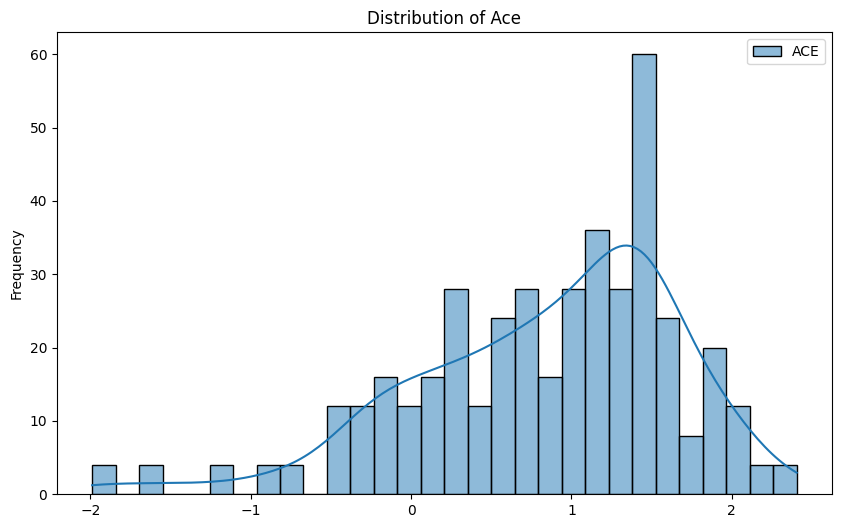

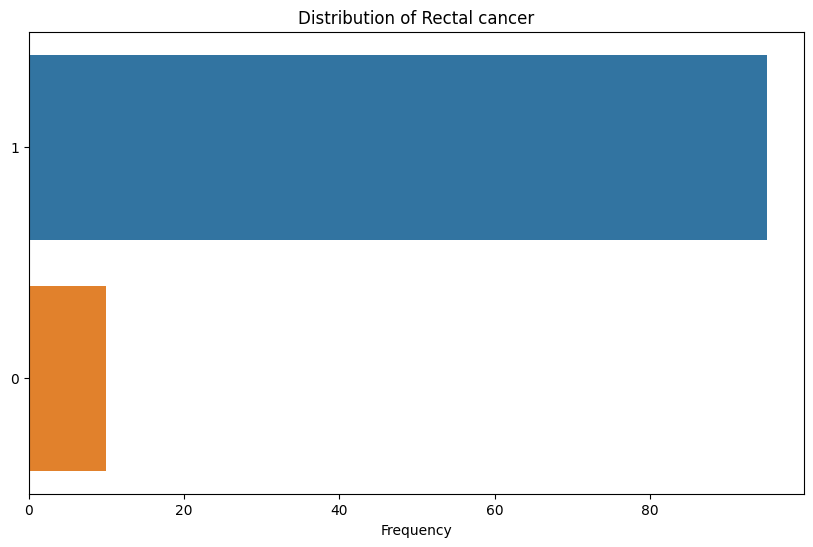

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'thca' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])


In [28]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,hypertension,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,rectal cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-AF-2687-01,0,0.410908,2.396474,-0.531035,-0.118372,-0.380378,0.05959,-0.754094,0.778654,0.088301,...,-1.587117,0.509567,0.85801,0.147323,0.852614,1.095073,-0.155195,1.547767,0.022788,1
TCGA-AF-2689-11,0,0.975608,2.391874,-0.531035,0.163828,-0.083278,-0.26031,-0.558094,0.834754,0.705501,...,0.167283,0.671867,-1.28139,-0.766577,1.633314,-0.394927,0.398105,1.410667,0.948188,0
TCGA-AF-2690-01,0,0.378808,-0.220626,-0.531035,-0.416872,-0.498578,0.44639,-0.800294,2.028054,-0.423399,...,1.895983,0.825967,-0.33609,-0.037277,1.156814,1.035173,0.081205,3.199267,0.744988,1
TCGA-AF-2691-11,0,0.882608,1.743474,0.302365,0.172928,0.085422,-0.30721,-0.868094,0.417154,0.696201,...,-0.228817,0.226967,-1.28139,-1.042077,1.493014,-0.839027,0.407105,2.157267,1.244388,0
TCGA-AF-2692-11,0,0.869808,2.152274,-0.531035,0.101328,0.291422,-0.21881,-0.384594,1.305554,0.616201,...,0.588783,0.224767,-1.28139,-0.443377,1.866614,0.814473,0.265905,1.950067,0.584788,0


Do regression & Cross Validation

In [29]:
import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized

In [30]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-29-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-29-abef56c5c9ec>:17: RuntimeWarning: divide by zero encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
<ipython-input-29-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


The cross-validation accuracy is 59.41% ± 11.47%


In [31]:
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-29-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


In [32]:
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-29-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


Discussion

In [33]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")


Effect of the condition on the target variable:
Variable: hypertension
Coefficient: 0.0000
p-value: 1



In [34]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)

Genes with corrected p-value < 0.05, affecting the trait rectal cancer conditional on the factor hypertension, sorted by corrected p-value:
    Variable  Coefficient  corrected_p_value
   KRTAP25-1    -0.452381       1.820594e-66
      SNAR-I     0.452381       1.820594e-66
   LOC286238     0.452381       1.820594e-66
      OR5D16    -0.452381       1.820594e-66
    KRTAP6-2    -0.452381       1.820594e-66
    KRTAP6-3     0.452381       1.820594e-66
      LRRC30    -0.452381       1.820594e-66
    VTRNA1-1     0.452381       1.820594e-66
      OR10J5     0.452381       1.820594e-66
      OR10G3     0.452381       1.820594e-66
      CT47A9    -0.452381       1.820594e-66
      CT47A7     0.452381       1.820594e-66
       OR2Z1     0.452381       1.820594e-66
      TTTY20     0.452381       1.820594e-66
    SNORA36C    -0.452381       1.820594e-66
       OR2M5     0.452381       1.820594e-66
        FTMT     0.452381       1.820594e-66
       OR2M7     0.452381       1.820594e-66
     